<a href="https://colab.research.google.com/github/anubhavgupta1/DeepLearning/blob/master/5_Back_propagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Outline**
1. Use generated data and classes from before
2. Code the back propagation algorithm for our first FF network - single weight and all weights
3. Visualize working of our first FF network
4. Code the back propagation algorithm for a larger FF network
5. Understand the iterative kernel within the back propagation algorithm
6. Exercises

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook 
import seaborn as sns
import imageio
from IPython.display import HTML


from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

from IPython import display

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

In [0]:
np.random.seed(0)

In [4]:
data, labels = make_blobs(n_samples=1000,n_features=2, centers=4,random_state=0)
print(data.shape,"\n", labels.shape)

#centres = 4 : 0,1,2,3 it tells us how many clusters we want

(1000, 2) 
 (1000,)


In [5]:
#x1
print(data[:,0])

[-2.50804312  0.4666179  -2.94062621 -2.89994656  2.34438803  0.87305123
  0.84032038  1.66287852  0.85810603 -0.72183574 -2.91242876  2.5539578
 -1.80372701 -1.29336908  1.12247848 -2.89206689 -2.42327374 -1.21013777
  0.4334086   2.6112302  -0.63762777 -0.38915158  2.42281242  0.61032732
  0.05105181 -2.24684455  2.03184442  1.50095789  1.85237068 -2.00715305
  2.72583797  1.13277662 -1.45654088 -0.560136    0.14227819  3.13950603
 -1.7379808   2.102906   -0.1223585  -0.84944184  1.3151742  -0.17119857
  0.60708824 -1.566172   -1.97218448  0.62283833  1.25671178 -0.92913737
 -1.47173266  0.06750683  3.28013809  2.12860164  0.84256852 -1.31193842
 -1.51946311  1.37724174 -0.65392827 -0.18108518 -1.6051273  -0.39772509
 -0.18433654  1.52256473 -1.70036791 -2.15246105 -0.09355151  0.7185082
  2.29540695 -1.13781004 -1.78024958 -1.30854331 -1.14302364 -1.02090982
 -0.43027817  0.13370355  0.78561658 -1.03301531  0.81860306 -0.26461958
 -2.73063921  2.99618514 -0.00924066 -1.57671974  1.5

In [6]:
#x2
print(data[:,1])

[ 7.86408052e+00  3.86571303e+00  8.56480636e+00  1.85014025e+00
  1.31053448e+00  4.71438583e+00  5.44067869e+00 -2.14847939e+00
  3.62360912e+00  4.69106780e+00  7.70889068e+00  1.94563582e+00
  4.04178757e+00  7.91458174e+00  2.14098304e+00  4.86498090e+00
  9.55150252e-01  7.25654188e+00  4.71983737e+00  1.79013755e+00
  4.09104705e+00  7.02583344e+00  1.08797522e+00 -3.12879334e-01
  1.27454018e+00  2.02430786e+00  1.97685839e+00  4.27026002e-01
  7.87780881e-01  3.85398981e+00  1.90157962e-01  4.53596836e+00
  9.40983125e+00  3.42595017e+00  6.19411141e+00  5.64031528e+00
  7.55616335e+00  3.22385582e+00  3.06432303e+00  2.96970265e+00
  6.32483089e+00  3.86596728e+00  4.06440815e+00  1.96894945e+00
  6.71583178e+00  2.68731314e+00  3.31066372e+00  8.14272480e+00
  3.21685972e+00  3.87946971e+00  9.62519766e-01  5.38340592e+00
  5.38153113e+00  3.01510149e+00  6.51828523e+00  2.19550945e+00
  4.76656958e+00  3.99149508e+00  8.38111734e+00  6.99633583e+00
  1.29916272e+00  1.98841

In [7]:
#Y
print(labels)

[3 0 3 2 1 0 0 1 0 0 3 1 2 3 1 2 2 3 0 1 0 3 1 1 1 2 1 1 1 2 1 0 3 2 3 0 3
 0 2 2 0 0 0 2 3 0 0 3 2 0 1 0 0 2 3 1 0 0 3 3 1 1 2 2 2 3 0 2 3 3 3 3 3 2
 0 3 0 3 2 1 0 0 0 2 1 0 0 0 2 2 3 2 2 3 3 3 2 2 0 0 1 2 0 1 0 2 0 3 2 1 0
 0 2 3 2 2 0 2 1 1 1 3 2 2 0 1 0 3 2 1 1 0 2 0 0 0 2 0 1 3 1 3 1 0 3 3 1 0
 3 3 1 0 0 0 2 0 0 0 1 2 3 1 0 0 0 0 3 3 0 1 2 1 1 1 2 1 2 1 1 0 2 0 2 0 0
 2 1 2 1 3 2 0 1 1 2 3 2 3 2 2 2 0 3 3 1 1 2 0 3 0 3 2 0 3 2 0 0 1 1 3 0 0
 0 3 0 0 0 2 3 3 0 2 0 0 2 1 2 1 1 2 0 2 1 1 3 3 3 3 3 3 0 2 3 2 2 1 2 0 3
 0 1 3 0 1 3 2 0 2 3 1 1 0 1 2 3 3 2 3 2 0 1 3 2 0 2 2 2 0 2 3 1 2 0 3 3 1
 3 1 0 3 1 3 3 2 2 3 0 0 1 0 0 0 3 1 2 0 2 1 0 3 0 3 1 2 2 0 3 1 3 1 3 1 3
 2 2 3 1 0 1 0 2 0 3 0 1 1 1 1 1 1 2 1 2 1 0 3 1 3 3 0 0 0 0 3 3 2 3 3 3 0
 3 1 2 3 2 1 2 0 3 3 3 0 2 1 1 1 3 3 2 3 1 3 1 3 2 3 3 1 1 0 3 2 3 2 2 1 0
 0 0 3 2 0 2 2 2 0 0 3 1 3 0 2 2 2 3 0 3 3 0 0 2 1 2 3 3 0 2 0 1 3 1 3 3 2
 2 0 1 0 0 0 2 3 0 2 3 1 2 1 3 1 0 1 0 3 3 1 2 3 3 1 0 2 0 0 0 0 0 1 2 0 2
 0 1 0 3 2 2 3 3 3 3 1 2 

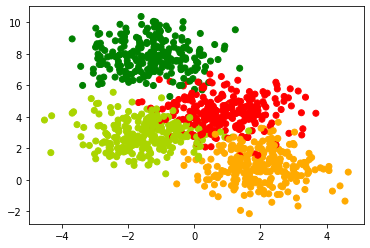

In [8]:
plt.scatter(data[:,0],data[:,1], c= labels, cmap=my_cmap)
plt.show()
# 3d plot

In [0]:
labels_orig = labels
labels = np.mod(labels_orig,2)

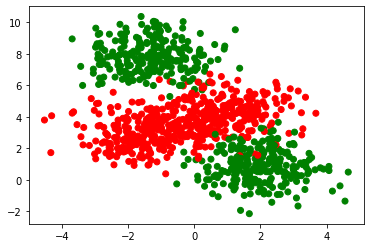

In [10]:
plt.scatter(data[:,0],data[:,1], c= labels, cmap=my_cmap)
plt.show()
# 3d plot

In [0]:
#The above graph clearly shows that it is not linearly separable

In [12]:
X_train, X_val, Y_train, Y_val = train_test_split(data,labels,stratify=labels,random_state =0)
print("Train data : \n", X_train.shape, Y_train.shape)
print("\nStratify ensures that distribution of red and green class is same in train and test data. ")

Train data : 
 (750, 2) (750,)

Stratify ensures that distribution of red and green class is same in train and test data. 


In [13]:
print("Validation data : \n", X_val.shape, Y_val.shape)

Validation data : 
 (250, 2) (250,)


In [0]:
class FFNetworkW1:
  
  def __init__(self):
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def forward_pass(self, x):
    self.x1, self.x2 = x
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.h3 = self.sigmoid(self.a3)
    return self.h3
  
  def grad(self, x, y):
    self.forward_pass(x)  
    self.dw1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x1
    
  
  def fit(self, X, Y, epochs=1, learning_rate=1, display_loss=False):
      
    if display_loss:
      loss = {}
      w1 = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0]*9
      for x, y in zip(X, Y):
        self.grad(x, y)
        dw1 += self.dw1

      m = X.shape[0]
      self.w1 -= learning_rate * dw1 / m
      
      if display_loss:
        w1[i] = self.w1
        Y_pred = self.predict(X)
        loss[i] = mean_squared_error(Y_pred, Y)
        
    
    if display_loss:
      plt.tight_layout()
      
      plt.subplot(2,1,1)
      plt.plot(list(w1.values()))
      plt.xlabel('Epochs')
      plt.ylabel('W1')
      
      plt.subplot(2,1,2)
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

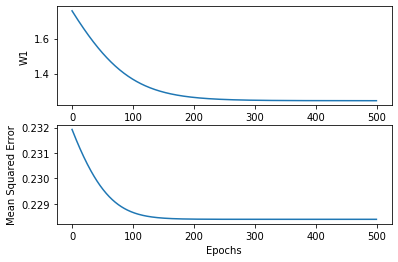

In [15]:
ffnw1 = FFNetworkW1()
ffnw1.fit(X_train, Y_train, epochs=500, learning_rate=1, display_loss=True)

Here we are updating only w1, keeping all other weights constant.

1. As we continue to decrease w1 the mse also continues to fall which means backpropation is working as expected. Our gradient descent is working well.


2. Both of these functions are saturation after a point. The wight is saturating at some point which means the gradient we have i.e. partial derivative of loss w.r.t. partial derivative of w1 is coming close to zero.
 self.dw1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x1 
 here Loss function is saturating to 0.227 approx that means (self.h3-y) is not approaching to zero; x1 and w5 are constants; 

So, the weight W1 stops training due to either h3 or h1 approaching values 0 or 1.



In [0]:
class FirstFFNetwork:
  
  def __init__(self):
    np.random.seed(0)
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def forward_pass(self, x):
    self.x1, self.x2 = x
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.h3 = self.sigmoid(self.a3)
    return self.h3
  
  def grad(self, x, y):
    self.forward_pass(x)
    
    self.dw5 = (self.h3-y) * self.h3*(1-self.h3) * self.h1
    self.dw6 = (self.h3-y) * self.h3*(1-self.h3) * self.h2
    self.db3 = (self.h3-y) * self.h3*(1-self.h3)
    
    self.dw1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x1
    self.dw2 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x2
    self.db1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1)
  
    self.dw3 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x1
    self.dw4 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x2
    self.db2 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2)
    
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False, display_weight=False):
    
    # initialise w, b
    if initialise:
      np.random.seed(0)
      self.w1 = np.random.randn()
      self.w2 = np.random.randn()
      self.w3 = np.random.randn()
      self.w4 = np.random.randn()
      self.w5 = np.random.randn()
      self.w6 = np.random.randn()
      self.b1 = 0
      self.b2 = 0
      self.b3 = 0
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0]*9
      for x, y in zip(X, Y):
        self.grad(x, y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3
        
      m = X.shape[0]
      self.w1 -= learning_rate * dw1 / m
      self.w2 -= learning_rate * dw2 / m
      self.w3 -= learning_rate * dw3 / m
      self.w4 -= learning_rate * dw4 / m
      self.w5 -= learning_rate * dw5 / m
      self.w6 -= learning_rate * dw6 / m
      self.b1 -= learning_rate * db1 / m
      self.b2 -= learning_rate * db2 / m
      self.b3 -= learning_rate * db3 / m
      
      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = mean_squared_error(Y_pred, Y)
        
      if display_weight:
        weight_matrix = np.array([[0, self.b3, self.w5, self.w6, 0, 0], [self.b1, self.w1, self.w2, self.b2, self.w3, self.w4]])
        weight_matrices.append(weight_matrix)
    
    if display_loss:
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

  def predict_h1(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h1)
    return np.array(Y_pred)
  
  def predict_h2(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h2)
    return np.array(Y_pred)
  
  def predict_h3(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h3)
    return np.array(Y_pred)

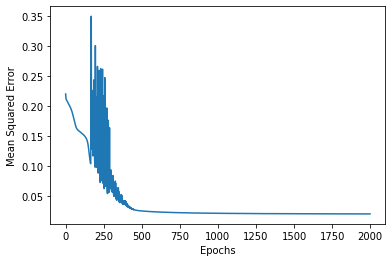

In [17]:
weight_matrices = []
ffn = FirstFFNetwork()
ffn.fit(X_train, Y_train, epochs=2000, learning_rate=5, display_loss=True, display_weight=True)

True

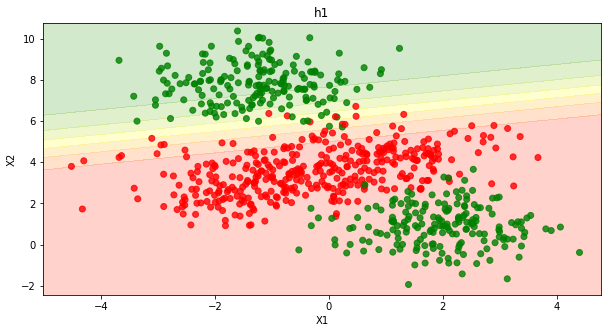

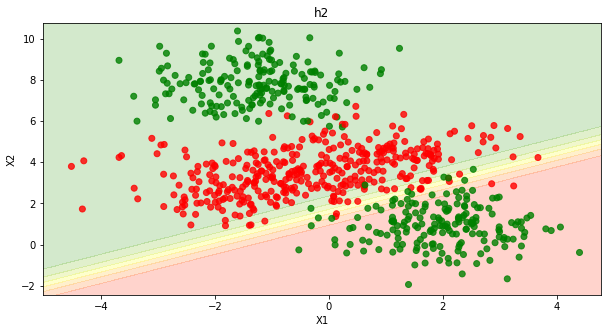

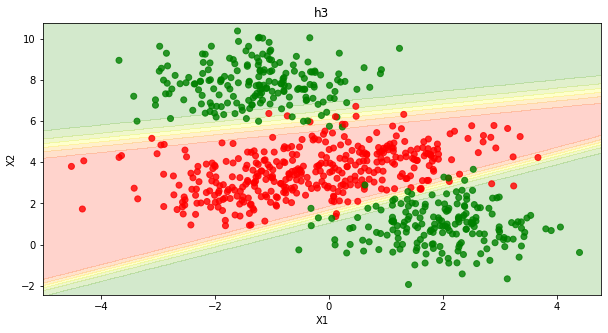

In [18]:
def make_meshgrid(x, y, h=.2):
    x_min, x_max = x.min() - 0.5, x.max() + 0.5
    y_min, y_max = y.min() - 0.5, y.max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy
  
def plot_contours(ax, predict, xx, yy, **params):
    Z = predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
  
def plot_boundary():
    xx, yy = make_meshgrid(X_train[:,0], X_train[:,1])
    predict_functions = [ffn.predict_h1, ffn.predict_h2, ffn.predict_h3]
    
    for i in range(3):

      fig, ax = plt.subplots(figsize=(10,5))

      plot_contours(ax, predict_functions[i], xx, yy,
                    cmap=my_cmap, alpha=0.2)
      ax.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=my_cmap, alpha=0.8)
      ax.set_xlim(xx.min(), xx.max())
      ax.set_ylim(yy.min(), yy.max())
      ax.set_xlabel('X1')
      ax.set_ylabel('X2')
      ax.set_title("h"+str(i+1))
      
    return True
  
plot_boundary()

In [0]:
def plot_heat_map(epoch):
    fig = plt.figure(figsize=(10, 1))
    sns.heatmap(weight_matrices[epoch], annot=True, cmap=my_cmap, vmin=-3, vmax=3)
    plt.title("Epoch "+str(epoch))

    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


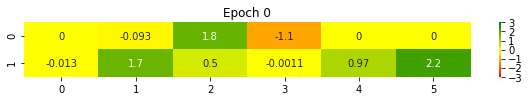

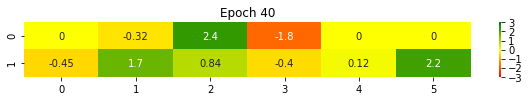

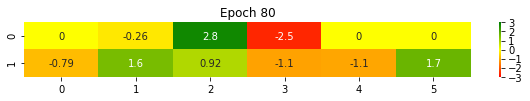

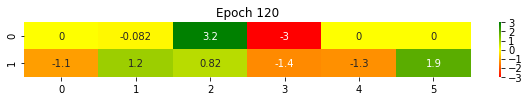

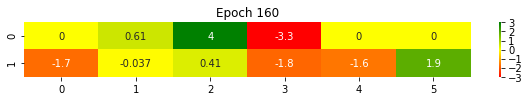

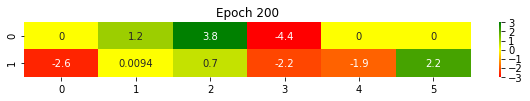

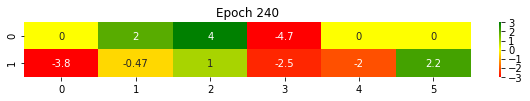

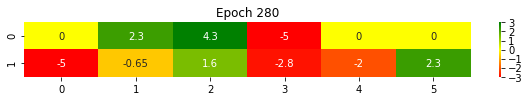

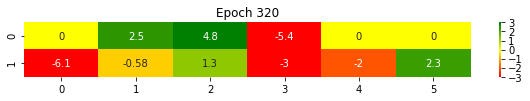

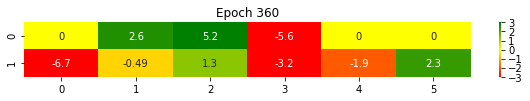

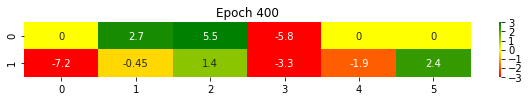

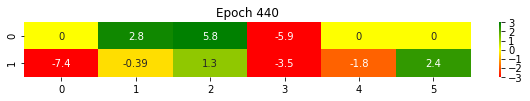

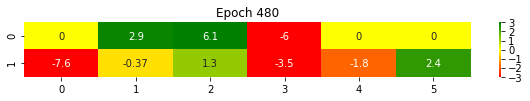

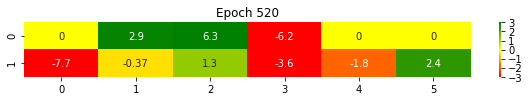

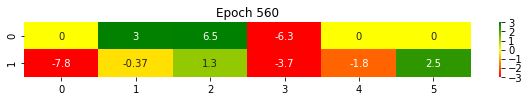

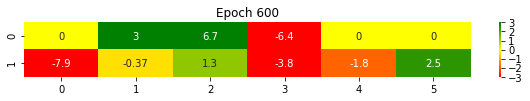

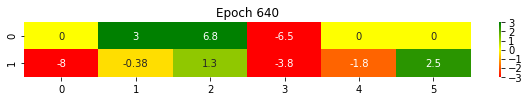

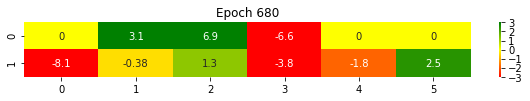

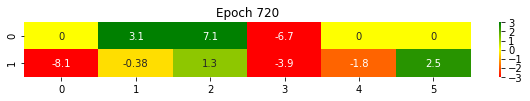

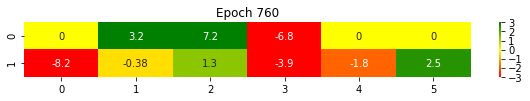

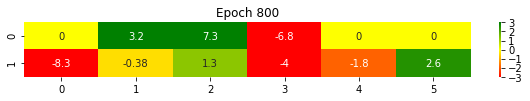

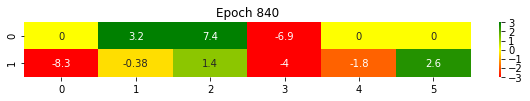

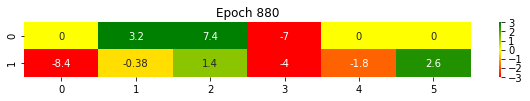

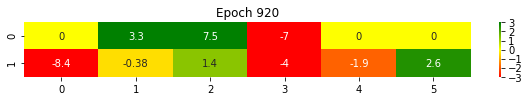

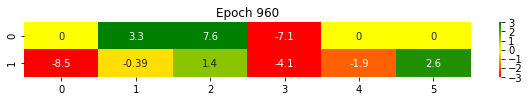

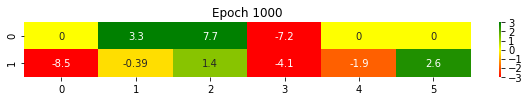

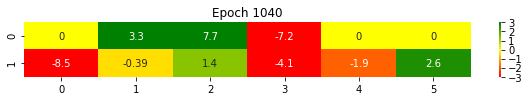

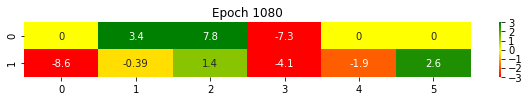

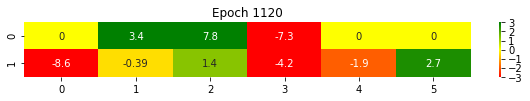

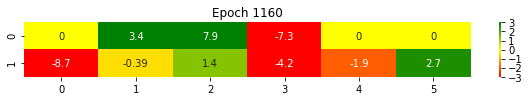

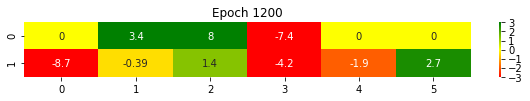

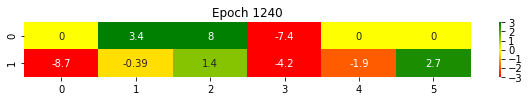

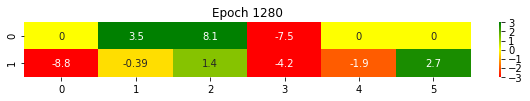

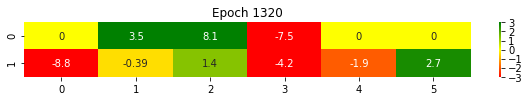

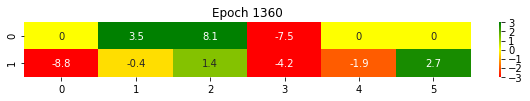

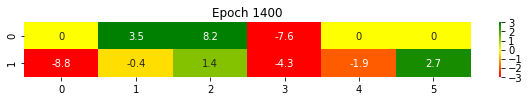

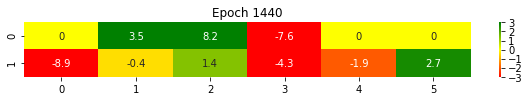

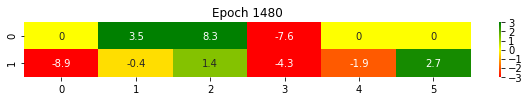

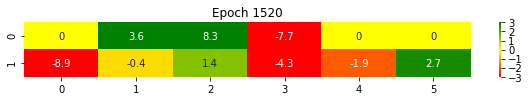

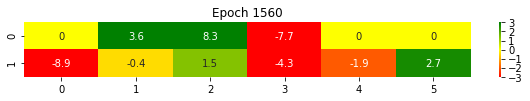

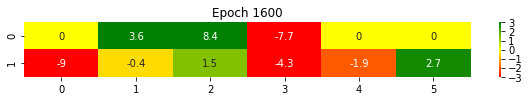

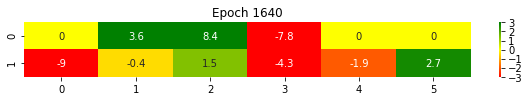

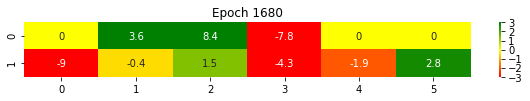

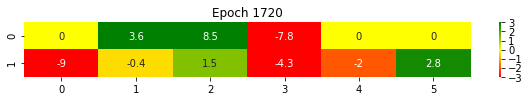

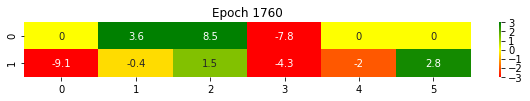

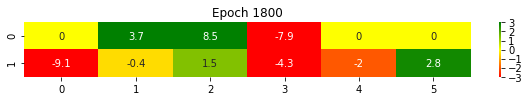

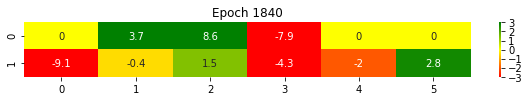

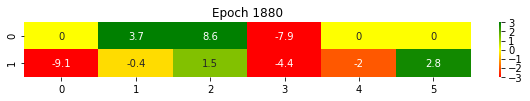

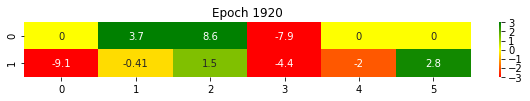

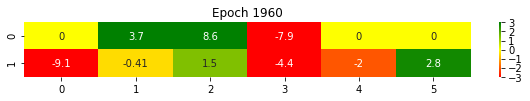

In [20]:
imageio.mimsave('./weights_viz.gif', [plot_heat_map(i) for i in range(0,len(weight_matrices),len(weight_matrices)//50)], fps=1)

1. Some numbers are constantly decreasing.
2. There is no significant vhange after epoch 500.
3. In epoch 1960, looking at the wight values, if there are features, let say we have 1000 features from x1 - x1000 and certain weights correponding to certain inputs are approaching to zero ( their absolute values is close to zero)that means those features are not very important  
neither of the weight is 0 if it were 0 then that means corresponding input is not important e.g. if w1 approached  then x1 has nit any significant role.
4. Many consecutive epochs of barely changing weight/bias values corresponds to section where loss plateaus in the loss graph.

In [21]:
HTML('<img src="weights_viz.gif">')

The above code generates zip file of gif images google collab does not support we use it in jupyter notebook.

Training accuracy 0.98
Validation accuracy 0.94


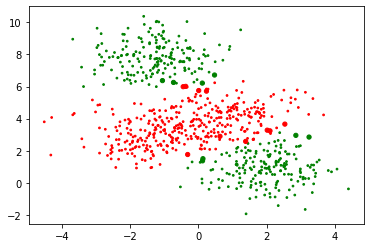

In [22]:
Y_pred_train = ffn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = ffn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap=my_cmap, s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

Multi class classification

In [23]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels_orig, stratify=labels_orig, random_state=0)
print(X_train.shape, X_val.shape, labels_orig.shape)
enc = OneHotEncoder()
# 0 -> (1, 0, 0, 0), 1 -> (0, 1, 0, 0), 2 -> (0, 0, 1, 0), 3 -> (0, 0, 0, 1)
y_OH_train = enc.fit_transform(np.expand_dims(Y_train,1)).toarray()
y_OH_val = enc.fit_transform(np.expand_dims(Y_val,1)).toarray()
print(y_OH_train.shape, y_OH_val.shape)

(750, 2) (250, 2) (1000,)
(750, 4) (250, 4)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

In [0]:
class FFSN_MultiClass_Specific:
  
  def __init__(self):
    np.random.seed(0)
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.w7 = np.random.randn()
    self.w8 = np.random.randn()
    self.w9 = np.random.randn()
    self.w10 = np.random.randn()
    self.w11 = np.random.randn()
    self.w12 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
    self.b4 = 0
    self.b5 = 0
    self.b6 = 0
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def forward_pass(self, x):
    # input layer
    self.x1, self.x2 = x
    
    # hidden layer
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    
    # output layer
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.a4 = self.w7*self.h1 + self.w8*self.h2 + self.b4
    self.a5 = self.w9*self.h1 + self.w10*self.h2 + self.b5
    self.a6 = self.w11*self.h1 + self.w12*self.h2 + self.b5
    sum_exps = np.sum([np.exp(self.a3), np.exp(self.a4), np.exp(self.a5), np.exp(self.a6)])
    self.h3 = np.exp(self.a3)/sum_exps
    self.h4 = np.exp(self.a4)/sum_exps
    self.h5 = np.exp(self.a5)/sum_exps
    self.h6 = np.exp(self.a6)/sum_exps
    
    return np.array([self.h3, self.h4, self.h5, self.h6])
  
  def grad(self, x, y):
    self.forward_pass(x)
    self.y1, self.y2, self.y3, self.y4 = y
    
    self.dw5 = (self.h3-self.y1) * self.h1 
    self.dw6 = (self.h3-self.y1) * self.h2
    self.db3 = (self.h3-self.y1)
                    
    self.dw7 = (self.h4-self.y2) * self.h1
    self.dw8 = (self.h4-self.y2) * self.h2
    self.db4 = (self.h4-self.y2)
    
    self.dw9 = (self.h5-self.y3) * self.h1
    self.dw10 = (self.h5-self.y3) * self.h2
    self.db5 = (self.h5-self.y3)
    
    self.dw11 = (self.h6-self.y4) * self.h1
    self.dw12 = (self.h6-self.y4) * self.h2
    self.db6 = (self.h6-self.y4)
                    
    self.dh1 = (self.h3-self.y1)*self.w5 + (self.h4-self.y2)*self.w7 + (self.h5-self.y3)*self.w9 + (self.h6-self.y4)*self.w11
    self.dw1 = self.dh1 * self.h1*(1-self.h1) * self.x1
    self.dw2 = self.dh1 * self.h1*(1-self.h1) * self.x2
    self.db1 = self.dh1 * self.h1*(1-self.h1)
                    
    self.dh2 = (self.h3-self.y1)*self.w6 + (self.h4-self.y2)*self.w8 + (self.h5-self.y3)*self.w10 + (self.h6-self.y4)*self.w12
    self.dw3 = self.dh2 * self.h2*(1-self.h2) * self.x1
    self.dw4 = self.dh2 * self.h2*(1-self.h2) * self.x2
    self.db2 = self.dh2 * self.h2*(1-self.h2)
    
  def grad_short(self, x, y):
    self.forward_pass(x)
    self.y1, self.y2, self.y3, self.y4 = y
    
    self.da3 = (self.h3-self.y1)
    self.da4 = (self.h4-self.y2)
    self.da5 = (self.h5-self.y3)
    self.da6 = (self.h6-self.y4)
    
    self.dw5 = self.da3*self.h1
    self.dw6 = self.da3*self.h2
    self.db3 = self.da3
    
    self.dw7 = self.da4*self.h1
    self.dw8 = self.da4*self.h2
    self.db3 = self.da4
    
    self.dw9 = self.da5*self.h1
    self.dw10 = self.da5*self.h2
    self.db3 = self.da5
    
    self.dw11 = self.da6*self.h1
    self.dw12 = self.da6*self.h2
    self.db3 = self.da6
    
    self.dh1 = self.da3*self.w5 + self.da4*self.w7 + self.da5*self.w9 + self.da6*self.w11
    self.dh2 = self.da3*self.w6 + self.da4*self.w8 + self.da5*self.w10 + self.da6*self.w12
    
    self.da1 = self.dh1 * self.h1*(1-self.h1)
    self.da2 = self.dh2 * self.h2*(1-self.h2)
    
    self.dw1 = self.da1*self.x1
    self.dw2 = self.da1*self.x2
    self.db1 = self.da1
    
    self.dw3 = self.da2*self.x1
    self.dw4 = self.da2*self.x2
    self.db2 = self.da2
    
  
  def fit(self, X, Y, epochs=1, learning_rate=1, display_loss=False, display_weight=False):
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw1, dw2, dw3, dw4, dw5, dw6, dw7, dw8, dw9, dw10, dw11, dw12, db1, db2, db3, db4, db5, db6  = [0]*18
      for x, y in zip(X, Y):
        self.grad(x, y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        dw7 += self.dw7
        dw8 += self.dw8
        dw9 += self.dw9
        dw10 += self.dw10
        dw11 += self.dw11
        dw12 += self.dw12
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3
        db1 += self.db4
        db2 += self.db5
        db3 += self.db6
        
      m = X.shape[0]
      self.w1 -= learning_rate * dw1 / m
      self.w2 -= learning_rate * dw2 / m
      self.w3 -= learning_rate * dw3 / m
      self.w4 -= learning_rate * dw4 / m
      self.w5 -= learning_rate * dw5 / m
      self.w6 -= learning_rate * dw6 / m
      self.w7 -= learning_rate * dw7 / m
      self.w8 -= learning_rate * dw8 / m
      self.w9 -= learning_rate * dw9 / m
      self.w10 -= learning_rate * dw10 / m
      self.w11 -= learning_rate * dw11 / m
      self.w12 -= learning_rate * dw12 / m
      self.b1 -= learning_rate * db1 / m
      self.b2 -= learning_rate * db2 / m
      self.b3 -= learning_rate * db3 / m
      self.b4 -= learning_rate * db4 / m
      self.b5 -= learning_rate * db5 / m
      self.b6 -= learning_rate * db6 / m
      
      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = log_loss(np.argmax(Y, axis=1), Y_pred)
        
      if display_weight:
        weight_matrix = np.array([[self.b3, self.w5, self.w6, 
                                   self.b4, self.w7, self.w8, 
                                   self.b5, self.w9, self.w10, 
                                   self.b6, self.w11, self.w12], 
                                  [0, 0, 0,
                                   self.b1, self.w1, self.w2,
                                   self.b2, self.w3, self.w4, 
                                   0, 0, 0]])
        weight_matrices.append(weight_matrix)
    
    if display_loss:
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      plt.ylabel('Log Loss')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

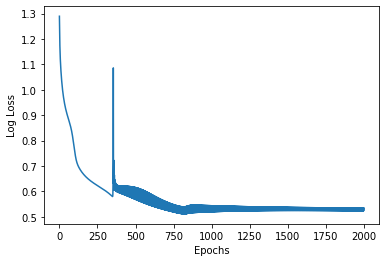

In [25]:
weight_matrices = []
ffsn_multi_specific = FFSN_MultiClass_Specific()
ffsn_multi_specific.fit(X_train,y_OH_train,epochs=2000,learning_rate=1,display_loss=True, display_weight=True)

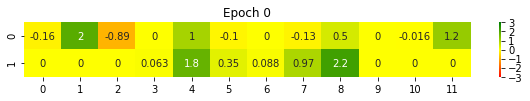

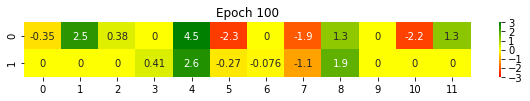

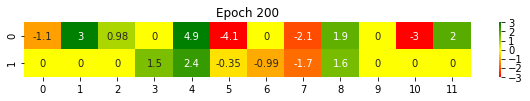

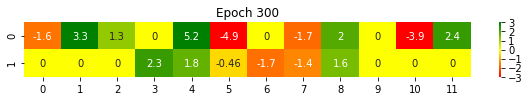

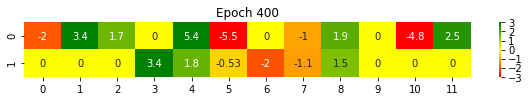

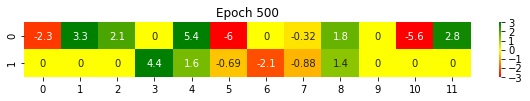

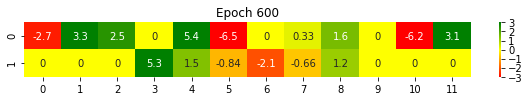

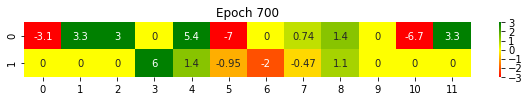

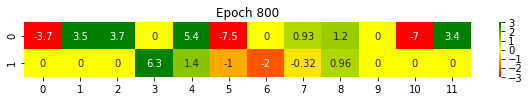

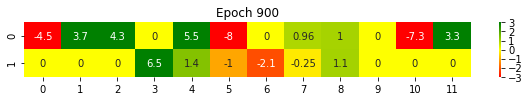

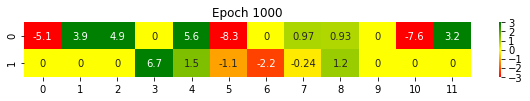

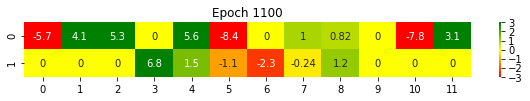

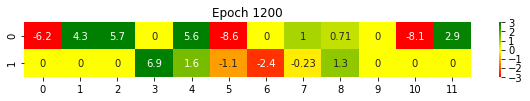

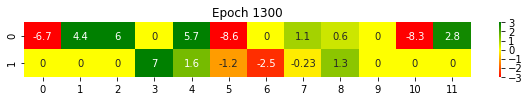

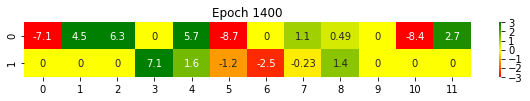

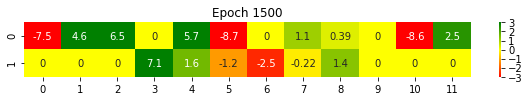

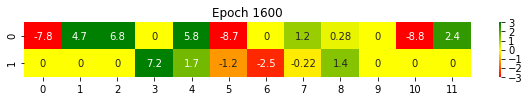

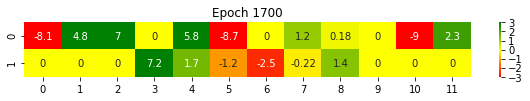

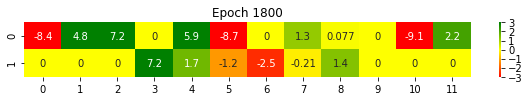

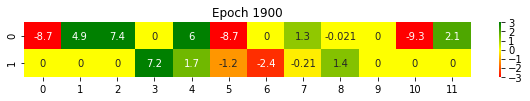

In [26]:
imageio.mimsave('./weights_viz_multi_class.gif', [plot_heat_map(i) for i in range(0,len(weight_matrices),len(weight_matrices)//20)], fps=1)

Training accuracy 0.79
Validation accuracy 0.8


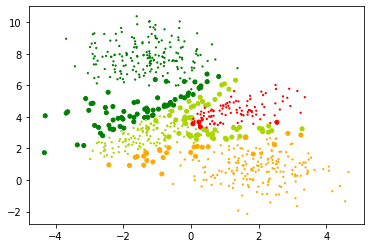

In [27]:
Y_pred_train = ffsn_multi_specific.predict(X_train)
Y_pred_train = np.argmax(Y_pred_train,1)

Y_pred_val = ffsn_multi_specific.predict(X_val)
Y_pred_val = np.argmax(Y_pred_val,1)

accuracy_train = accuracy_score(Y_pred_train, Y_train)
accuracy_val = accuracy_score(Y_pred_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_train, cmap=my_cmap, s=15*(np.abs(np.sign(Y_pred_train-Y_train))+.1))
plt.show()

Testing Vectorisation

In [0]:
N = 100
M = 200
a = np.random.randn(N,M)
b = np.random.randn(N,M)
c = np.zeros((N,M))

In [29]:
print(a.shape,b.shape,c.shape)

(100, 200) (100, 200) (100, 200)


In [30]:
%time  
for i in range(N):
  for j in range(M):
    c[i,j] = a[i,j] + b[i,j]


CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 15.3 µs


In [31]:
%time  #magic ommand
c =  a + b

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs


In [0]:
w1 = np.random.randn(2,2)
w2 = np.random.randn(2,4)

In [33]:
print(w1)

[[-0.58413134 -0.80175532]
 [-0.19222028 -0.34504265]]


In [34]:
print(w2)

[[ 0.386518   -1.22642977  0.58803929  0.2358413 ]
 [ 0.92292513 -2.50784472  0.41161543  0.61696779]]


In [0]:
class FF_MultiClass_Scalar:
  
  def __init__(self,W1,W2):
    self.w1 = W1[0][0].copy()
    self.w2 = W1[1][0].copy()
    self.w3 = W1[0][1].copy()
    self.w4 = W1[1][1].copy()
    self.w5 = W2[0][0].copy()
    self.w6 = W2[1][0].copy()
    self.w7 = W2[0][1].copy()
    self.w8 = W2[1][1].copy()
    self.w9 = W2[0][2].copy()
    self.w10 = W2[1][2].copy()
    self.w11 = W2[0][3].copy()
    self.w12 = W2[1][3].copy()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
    self.b4 = 0
    self.b5 = 0
    self.b6 = 0

  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def softmax(self,x):
    exps = np.exp(x) 
    return exps/np.sum(exps)
  
  def forward_pass(self, x):

    # input layer
    self.x1, self.x2 = x

    # hidden layer
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    
    # output layer
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.a4 = self.w7*self.h1 + self.w8*self.h2 + self.b4
    self.a5 = self.w9*self.h1 + self.w10*self.h2 + self.b5
    self.a6 = self.w11*self.h1 + self.w12*self.h2 + self.b5
    sum_exps = np.sum([np.exp(self.a3), np.exp(self.a4), np.exp(self.a5), np.exp(self.a6)])
    self.h3 = np.exp(self.a3)/sum_exps
    self.h4 = np.exp(self.a4)/sum_exps
    self.h5 = np.exp(self.a5)/sum_exps
    self.h6 = np.exp(self.a6)/sum_exps
    
    return np.array([self.h3, self.h4, self.h5, self.h6])

  
  def grad(self, x, y):
    self.forward_pass(x)
    self.y1, self.y2, self.y3, self.y4 = y

    self.da3 = (self.h3-self.y1)
    self.da4 = (self.h4-self.y2)
    self.da5 = (self.h5-self.y3)
    self.da6 = (self.h6-self.y4)
    
    self.dw5 = self.da3 * self.h1 
    self.dw6 = self.da3 * self.h2
    self.db3 = self.da3
                    
    self.dw7 = self.da4 * self.h1
    self.dw8 = self.da4 * self.h2
    self.db4 = self.da4
    
    self.dw9 = self.da5 * self.h1
    self.dw10 = self.da5 * self.h2
    self.db5 = self.da5
    
    self.dw11 = self.da6 * self.h1
    self.dw12 = self.da6 * self.h2
    self.db6 = self.da6
                    
    self.dh1 = self.da3*self.w5 + self.da4 *self.w7 + self.da5*self.w9 + self.da6*self.w11
    self.dh2 = self.da3*self.w6 + self.da4 *self.w8 + self.da5*self.w10 + self.da6*self.w12

    self.da1 = self.dh1 * self.h1*(1-self.h1)
    self.da2 = self.dh2 * self.h2*(1-self.h2)

    self.dw1 = self.da1 * self.x1
    self.dw2 = self.da1 * self.x2
    self.db1 = self.da1
                    

    self.dw3 = self.da2 * self.x1
    self.dw4 = self.da2 * self.x2
    self.db2 = self.da2
  
    
  def fit(self, X, Y, epochs=1, learning_rate=1, display_loss=False):
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw1, dw2, dw3, dw4, dw5, dw6, dw7, dw8, dw9, dw10, dw11, dw12, db1, db2, db3, db4, db5, db6  = [0]*18
      for x, y in zip(X, Y):
        self.grad(x, y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        dw7 += self.dw7
        dw8 += self.dw8
        dw9 += self.dw9
        dw10 += self.dw10
        dw11 += self.dw11
        dw12 += self.dw12
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3
        db1 += self.db4
        db2 += self.db5
        db3 += self.db6
        
      m = X.shape[0]
      self.w1 -= learning_rate * dw1 / m
      self.w2 -= learning_rate * dw2 / m
      self.w3 -= learning_rate * dw3 / m
      self.w4 -= learning_rate * dw4 / m
      self.w5 -= learning_rate * dw5 / m
      self.w6 -= learning_rate * dw6 / m
      self.w7 -= learning_rate * dw7 / m
      self.w8 -= learning_rate * dw8 / m
      self.w9 -= learning_rate * dw9 / m
      self.w10 -= learning_rate * dw10 / m
      self.w11 -= learning_rate * dw11 / m
      self.w12 -= learning_rate * dw12 / m
      self.b1 -= learning_rate * db1 / m
      self.b2 -= learning_rate * db2 / m
      self.b3 -= learning_rate * db3 / m
      self.b4 -= learning_rate * db4 / m
      self.b5 -= learning_rate * db5 / m
      self.b6 -= learning_rate * db6 / m
      
      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = log_loss(np.argmax(Y, axis=1), Y_pred)
        
      
    
    if display_loss:
      Wt1 = [[self.w1,self.w3],[self.w2,self.w4]] 
      Wt2 = [[self.w5,self.w7,self.w9,self.w11],[self.w6,self.w8,self.w10,self.w12]]
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      plt.ylabel('Log Loss')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

In [0]:
class FF_MultiClass_WeightVectorised:
  def __init__(self,W1,W2):
    self.W1 = W1.copy()
    self.W2 = W2.copy()
    self.B1 = np.zeros((1,2))
    self.B2 = np.zeros((1,4))
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def softmax(self,x):
    exps = np.exp(x) 
    return exps/np.sum(exps)
  
  def forward_pass(self, x):

    # input layer
    x = x.reshape(1,-1) # (1,2)

    # hidden layer
    self.A1 = np.matmul(x,self.W1) + self.B1 # (1,2) * (2,2) ----> (1,2)
    self.H1 = self.sigmoid(self.A1) # sigmoid((1,2)) ----> (1,2)
    self.A2 = np.matmul(self.H1,self.W2) + self.B2 # (1,2) * (2,4) ----> (1,4)

    #output Layer
    self.H2 = self.softmax(self.A2)# softmax((1,4)) ----> (1,4)
    return self.H2 #return (1,4) 
    
    
  def grad_sigmoid(self,x):
    return x * (1-x)
  
  def grad(self, x, y):
    self.forward_pass(x)
  
    x = x.reshape(1,-1) #(1,2)
    y = y.reshape(1,-1) #(1,4)

    self.dA2 = self.H2 - y  #(1,4) - (1,4) = (1,4)
    self.dW2 = np.matmul(self.H1.T,self.dA2)#(2,1) * (1,4) -----> (2,4)
    self.dB2 = self.dA2 #(1,4)
    self.dH1 = np.matmul(self.dA2,self.W2.T)#(1,4) * (4,2) -----> (1,2)
    
    # gradient of h1 w.r.t. a1
    gdH1 = self.grad_sigmoid(self.H1) 

    self.dA1 = np.multiply(self.dH1,gdH1) #(1,2)
    self.dW1 = np.matmul(x.T,self.dA1)#(2,1) * (1,2) -----> (2,2)
    self.dB1 = self.dA1 #(1,2)
    
    
  
  def fit(self, X, Y, epochs=1, learning_rate=1, display_loss=False):
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dW1 = np.zeros((2,2))
      dW2 = np.zeros((2,4))
      dB1 = np.zeros((1,2))
      dB2 = np.zeros((1,4))
      for x, y in zip(X, Y):
        self.grad(x, y)
        dW1 += self.dW1
        dW2 += self.dW2
        dB1 += self.dB1
        dB2 += self.dB2
        
      m = X.shape[0]
      self.W2 -= learning_rate * (dW2 / m)
      self.B2 -= learning_rate * (dB2 / m)
      self.W1 -= learning_rate * (dW1 / m)
      self.B1 -= learning_rate * (dB1 / m)
      
      
      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = log_loss(np.argmax(Y, axis=1), Y_pred)
        
      
    
    if display_loss:
       plt.plot(list(loss.values()))
       plt.xlabel('Epochs')
       plt.ylabel('Log Loss')
       plt.show()
  
  
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred).squeeze()

In [0]:
class FF_MultiClass_InputWeightVectorised:
  def __init__(self,W1,W2):
    self.W1 = W1.copy()
    self.W2 = W2.copy()
    self.B1 = np.zeros((1,2))
    self.B2 = np.zeros((1,4))
  
  def sigmoid(self, X):
    return 1.0/(1.0 + np.exp(-X))
  
  def softmax(self,X):
    exps = np.exp(X) 
    return exps/np.sum(exps,axis =1).reshape(-1,1)
  
  def forward_pass(self, X):

    # hidden layer
    self.A1 = np.matmul(X,self.W1) + self.B1 # (N,2) * (2,2) ----> (N,2)
    self.H1 = self.sigmoid(self.A1) # sigmoid((N,2)) ----> (N,2)
    self.A2 = np.matmul(self.H1,self.W2) + self.B2 # (N,2) * (2,4) ----> (N,4)

    #output Layer
    self.H2 = self.softmax(self.A2)# softmax((N,4)) ----> (N,4)
    return self.H2 #return (N,4) 
    
    
  def grad_sigmoid(self,X):
    return X * (1-X)
  
  def grad(self, X, Y):
    self.forward_pass(X)
    m = X.shape[0]
    self.dA2 = self.H2 - Y  #(N,4) - (N,4) = (N,4)
    self.dW2 = np.matmul(self.H1.T,self.dA2)#(2,N) * (N,4) -----> (2,4)
    self.dB2 = np.sum(self.dA2, axis = 0).reshape(1,-1) #(N,4) ---> (1,4)
    self.dH1 = np.matmul(self.dA2,self.W2.T)#(N,4) * (4,2) -----> (N,2)
    
    # gradient of h1 w.r.t. a1
    gdH1 = self.grad_sigmoid(self.H1) #(N,2)

    self.dA1 = np.multiply(self.dH1,gdH1) #(N,2) .* (N,2) ---> (N,2)
    self.dW1 = np.matmul(X.T,self.dA1)#(2,N) * (N,2) -----> (2,2)
    self.dB1 =  np.sum(self.dA1, axis = 0).reshape(1,-1) #(N,2) ----> (1,2)
    
  
  def fit(self, X, Y, epochs=1, learning_rate=1, display_loss=False):
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
    
      self.grad(X, Y)  # X ---> (N,2) , Y ---> (N,4) 
      m = X.shape[0]
      self.W2 -= learning_rate * (self.dW2 / m)
      self.B2 -= learning_rate * (self.dB2 / m)
      self.W1 -= learning_rate * (self.dW1 / m)
      self.B1 -= learning_rate * (self.dB1 / m)
      
      
      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = log_loss(np.argmax(Y, axis=1), Y_pred)
        
      
    
    if display_loss:
       plt.plot(list(loss.values()))
       plt.xlabel('Epochs')
       plt.ylabel('Log Loss')
       plt.show()
  
  
 
      
  def predict(self, X):
    Y_pred = self.forward_pass(X)
    return np.array(Y_pred).squeeze()

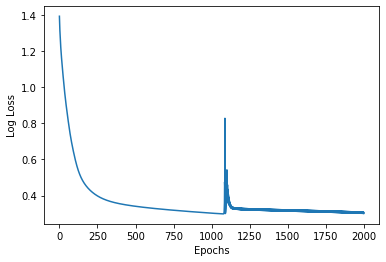

Time taken by a model 1 : 130.7842264175415 


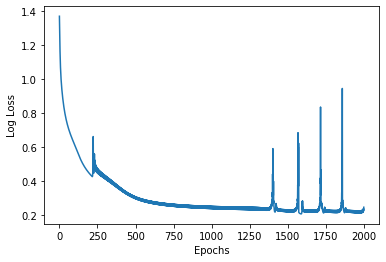

Time taken by a model 2 : 88.32947969436646 


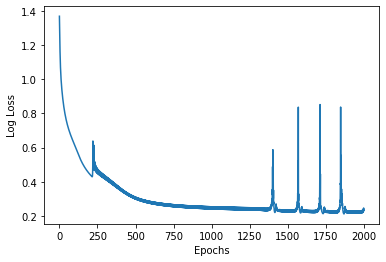

Time taken by a model 3 : 3.1475577354431152 


In [44]:
import time
models_init = [FF_MultiClass_Scalar(w1,w2),FF_MultiClass_WeightVectorised(w1,w2),FF_MultiClass_InputWeightVectorised(w1,w2)]
models = []
for idx, model in enumerate(models_init,start=1): #idx is here iteration variable; enumerate returns both iteration variable and models 
  tic = time.time()
  ffsn_multi_specific = model
  ffsn_multi_specific.fit(X_train,y_OH_train,epochs = 2000,learning_rate=1,display_loss=True)
  models.append(ffsn_multi_specific)
  toc = time.time()
  print("Time taken by a model {} : {} ".format(idx,toc-tic))


Model 1 
Training Accuracy  0.89
Test Accuracy  0.88




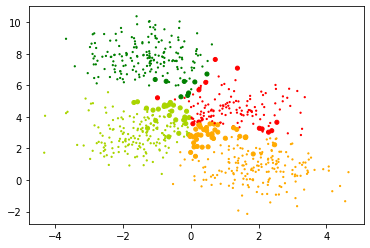

Model 2 
Training Accuracy  0.9
Test Accuracy  0.91




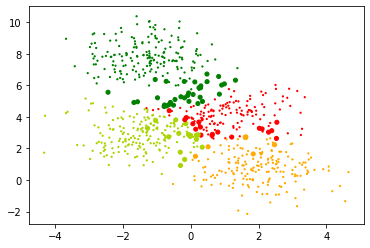

Model 3 
Training Accuracy  0.91
Test Accuracy  0.9




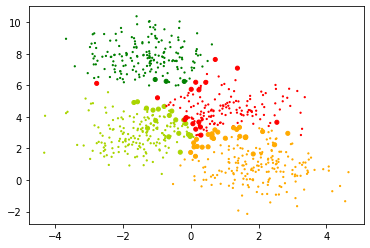

In [47]:
for idx, model in enumerate(models_init,start=1): 
  Y_pred_train = model.predict(X_train)
  Y_pred_train = np.argmax(Y_pred_train,1)

  Y_pred_val = model.predict(X_val)
  Y_pred_val = np.argmax(Y_pred_val,1)

  accuracy_train = accuracy_score(Y_pred_train,Y_train) 
  accuracy_val = accuracy_score(Y_pred_val,Y_val)

  print("Model {} ".format(idx))
  print("Training Accuracy ", round(accuracy_train,2))
  print("Test Accuracy ", round(accuracy_val,2))
  print("\n")
  plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_train, cmap=my_cmap, s=15*(np.abs(np.sign(Y_pred_train-Y_train))+.1))
  plt.show()
